<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

#Data


#Approach

In [34]:
!pip install -U ppscore
!pip install ppscore

####Mount Google Drive to Google Colab Notebook

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Data Preprocessing

In [35]:
import pandas as pd
import seaborn as sns
import os
import glob
import numpy as np
import ppscore as pps
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import ppscore as pps
from IPython.display import Image
%matplotlib inline

### Load Data from Files in Dask Dataframes

In [ ]:
###############################################################################################################

In [123]:
file_dir = '/content/gdrive/MyDrive/raw_data'
!ls $file_dir

coconut_oil_pri.csv  exmaus.csv		 rapeseed_oil.csv   wti.csv
cpo_pri.csv	     olive_oil_.csv	 soybean_oil.csv
df.csv		     peanut_oil_pri.csv  sunflower_oil.csv


In [124]:
# Number of files we are dealing with
!ls $file_dir | wc -l

10


In [125]:
# Get a python list of csv files
files = glob.glob(os.path.join(file_dir, "*.csv"))

In [126]:
# Look at a few to see how we can merge them
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
df6 = pd.read_csv(files[5])
df7 = pd.read_csv(files[6])
df8 = pd.read_csv(files[7])
df9 = pd.read_csv(files[8])


print(df1.head(), "\n")
print(df2.head(), "\n")
print(df3.head(), "\n")
print(df4.head(), "\n")
print(df5.head(), "\n")
print(df6.head(), "\n")
print(df7.head(), "\n")
print(df8.head(), "\n")
print(df9.head(), "\n")

     Month  cno_pri
0  1991-09      455
1  1991-10      546
2  1991-11      595
3  1991-12      636
4  1992-01      738 

     Month  cpo_pri
0  1991-09      323
1  1991-10      345
2  1991-11      362
3  1991-12      376
4  1992-01      383 

     Month  exmaus
0  1971-01  3.0755
1  1971-02  3.0661
2  1971-03  3.0659
3  1971-04  3.0671
4  1971-05  3.0635 

     Month  oli_pri
0  1991-09  3102.61
1  1991-10  3100.45
2  1991-11  3199.41
3  1991-12  3281.67
4  1992-01  3261.65 

     Month  rps_pri
0  2002-02   423.45
1  2002-03   415.85
2  2002-04   410.77
3  2002-05   414.82
4  2002-06   451.04 

     Month  pno_pri
0  1991-09    844.0
1  1991-10    799.0
2  1991-11    718.0
3  1991-12    614.0
4  1992-01    619.0 

     Month  sbo_pri
0  1991-09    468.0
1  1991-10    485.0
2  1991-11    466.0
3  1991-12    442.0
4  1992-01    429.0 

     Month  sfo_pri
0  2002-02    578.0
1  2002-03    557.0
2  2002-04    552.0
3  2002-05    574.0
4  2002-06    595.0 

     Month  wti_spri
0  2001-0

In [127]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], axis=1, join='inner')
df.set_index('Month', inplace=True)

print(df.head())
df.to_csv('df.csv')

                                                    cno_pri  ...  wti_spri
Month                                                        ...          
(1991-09, 1991-09, 1971-01, 1991-09, 2002-02, 1...      455  ...     28.67
(1991-10, 1991-10, 1971-02, 1991-10, 2002-03, 1...      546  ...     24.49
(1991-11, 1991-11, 1971-03, 1991-11, 2002-04, 1...      595  ...     22.06
(1991-12, 1991-12, 1971-04, 1991-12, 2002-05, 1...      636  ...     21.64
(1992-01, 1992-01, 1971-05, 1992-01, 2002-06, 1...      738  ...     22.30

[5 rows x 9 columns]


In [132]:
df = pd.read_csv('df.csv')

In [133]:
date_rng = pd.date_range(start='2002-02', end='2021-08', freq='MS')

In [134]:
df['Month'] = pd.DataFrame(date_rng, columns=['Month'])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     230 non-null    datetime64[ns]
 1   cno_pri   230 non-null    int64         
 2   cpo_pri   230 non-null    int64         
 3   exmaus    230 non-null    float64       
 4   oli_pri   230 non-null    float64       
 5   rps_pri   230 non-null    float64       
 6   pno_pri   230 non-null    float64       
 7   sbo_pri   230 non-null    float64       
 8   sfo_pri   230 non-null    float64       
 9   wti_spri  230 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 18.1 KB


In [136]:
df.head()

,Month,cno_pri,cpo_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
0,2002-02-01,455,323,3.0755,3102.61,423.45,844.0,468.0,578.0,28.67
1,2002-03-01,546,345,3.0661,3100.45,415.85,799.0,485.0,557.0,24.49
2,2002-04-01,595,362,3.0659,3199.41,410.77,718.0,466.0,552.0,22.06
3,2002-05-01,636,376,3.0671,3281.67,414.82,614.0,442.0,574.0,21.64
4,2002-06-01,738,383,3.0635,3261.65,451.04,619.0,429.0,595.0,22.30


In [137]:
df.tail()

,Month,cno_pri,cpo_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
225,2020-11-01,993,826,2.6945,2925.80,1047.78,1366.87,860.28,1667.82,34.03
226,2020-12-01,1031,844,2.7028,2934.73,1097.63,1366.87,910.82,1680.32,35.50
227,2021-01-01,1170,944,2.7032,3087.55,1138.24,1383.90,997.62,1375.09,35.81
228,2021-02-01,1275,949,2.7041,3068.01,1272.13,1426.71,1035.26,1359.46,33.59
229,2021-03-01,1412,1026,2.7032,3093.28,1321.88,1471.32,1146.75,1444.54,33.57


#### Rearrange the target variable to be in front of dataframe

In [138]:
df = df[['Month', 'cpo_pri', 'cno_pri', 'oli_pri', 'sbo_pri', 'pno_pri', 'sfo_pri', 'exmaus', 'rps_pri', 'wti_spri']]

In [139]:
df2 = df[['cpo_pri', 'cno_pri', 'oli_pri', 'sbo_pri', 'pno_pri', 'sfo_pri', 'exmaus', 'rps_pri', 'wti_spri']]

In [140]:
df2.head()

,cpo_pri,cno_pri,oli_pri,sbo_pri,pno_pri,sfo_pri,exmaus,rps_pri,wti_spri
0,323,455,3102.61,468.0,844.0,578.0,3.0755,423.45,28.67
1,345,546,3100.45,485.0,799.0,557.0,3.0661,415.85,24.49
2,362,595,3199.41,466.0,718.0,552.0,3.0659,410.77,22.06
3,376,636,3281.67,442.0,614.0,574.0,3.0671,414.82,21.64
4,383,738,3261.65,429.0,619.0,595.0,3.0635,451.04,22.30


#### Check for missing values

In [141]:
pd.isnull(df2).any()

cpo_pri     False
cno_pri     False
oli_pri     False
sbo_pri     False
pno_pri     False
sfo_pri     False
exmaus      False
rps_pri     False
wti_spri    False
dtype: bool

####Inference
There are no missing values

##### Check for zero values


In [142]:
df2[df2==0].count()

cpo_pri     0
cno_pri     0
oli_pri     0
sbo_pri     0
pno_pri     0
sfo_pri     0
exmaus      0
rps_pri     0
wti_spri    0
dtype: int64

####There are no zero values

In [143]:
df2.isnull().sum()

cpo_pri     0
cno_pri     0
oli_pri     0
sbo_pri     0
pno_pri     0
sfo_pri     0
exmaus      0
rps_pri     0
wti_spri    0
dtype: int64

####Inference
No missing value in each column

####Cehck for duplicates

In [161]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
225    False
226    False
227    False
228    False
229    False
Length: 230, dtype: bool

In [163]:
df2.cpo_pri.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
225     True
226    False
227    False
228    False
229    False
Name: cpo_pri, Length: 230, dtype: bool

In [164]:
df2.cno_pri.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
225    False
226    False
227    False
228    False
229    False
Name: cno_pri, Length: 230, dtype: bool

In [168]:
df2.duplicated().sum()

0

##### Count the number of non-duplicates

In [169]:
(~df2.duplicated()).sum()

230

##Exploratory Data Analysis

##### Descriptive statistics to summarise the distribution of the dataset

In [144]:
df2.describe()

,cpo_pri,cno_pri,oli_pri,sbo_pri,pno_pri,sfo_pri,exmaus,rps_pri,wti_spri
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,548.317391,655.239130,3889.589609,612.276348,1053.667826,963.294043,2.475496,905.669565,50.355957
std,211.930241,230.962084,1026.232807,234.478608,363.442143,338.292149,0.216307,244.115789,16.153374
min,234.000000,285.000000,2536.490000,286.890000,562.000000,543.000000,2.122000,410.770000,15.200000
25%,397.250000,497.250000,3087.580000,457.857500,807.250000,718.280000,2.320475,770.340000,37.635000
50%,498.500000,637.500000,3638.785000,561.225000,989.000000,844.500000,2.457850,850.100000,49.835000
75%,643.250000,735.500000,4592.002500,662.750000,1224.937500,1114.000000,2.584575,1009.657500,62.120000
max,1377.000000,1551.000000,6241.910000,1535.160000,2427.180000,2045.000000,3.075500,1591.880000,86.120000


####Histogram plotting the distribution of the target variable cpo_pri

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


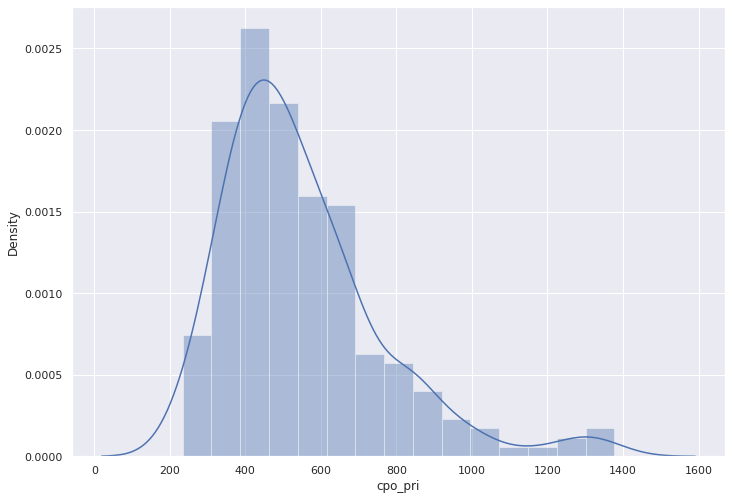

In [145]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df2['cpo_pri'], hist=True);
plt.show()

####Inference
The values of cpo_pri are distributed normally with a few outliers

####Normal probability plot

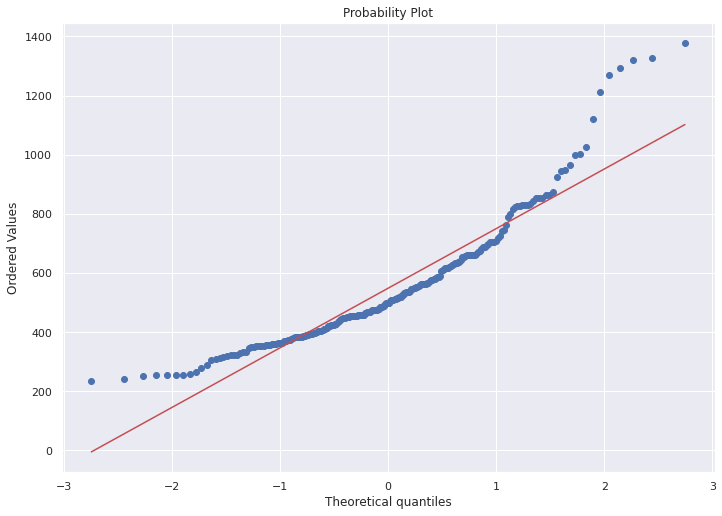

In [146]:
from scipy import stats
# Data distribution should closely follow the diagonal that represents the normal distribution.
res = stats.probplot(df2['cpo_pri'], plot=plt)

In [147]:
#skewness and kurtosis
print("Skewness: {:0.3f}".format(df2['cpo_pri'].skew()))
print("Kurtosis: {:0.3f}".format(df2['cpo_pri'].kurt()))

Skewness: 1.455
Kurtosis: 2.732


In [179]:
numerical_vars = ['cpo_pri',	'cno_pri',	'oli_pri',	'sbo_pri',	'pno_pri',	'sfo_pri',	
                 'exmaus',	'rps_pri',	'wti_spri']

In [147]:
df[numerical_vars].describe

<bound method NDFrame.describe of      cpo_pri  cno_pri  oli_pri  sbo_pri  ...  sfo_pri  exmaus  rps_pri  wti_spri
0        323      455  3102.61   468.00  ...   578.00  3.0755   423.45     28.67
1        345      546  3100.45   485.00  ...   557.00  3.0661   415.85     24.49
2        362      595  3199.41   466.00  ...   552.00  3.0659   410.77     22.06
3        376      636  3281.67   442.00  ...   574.00  3.0671   414.82     21.64
4        383      738  3261.65   429.00  ...   595.00  3.0635   451.04     22.30
..       ...      ...      ...      ...  ...      ...     ...      ...       ...
225      826      993  2925.80   860.28  ...  1667.82  2.6945  1047.78     34.03
226      844     1031  2934.73   910.82  ...  1680.32  2.7028  1097.63     35.50
227      944     1170  3087.55   997.62  ...  1375.09  2.7032  1138.24     35.81
228      949     1275  3068.01  1035.26  ...  1359.46  2.7041  1272.13     33.59
229     1026     1412  3093.28  1146.75  ...  1444.54  2.7032  1321.88     

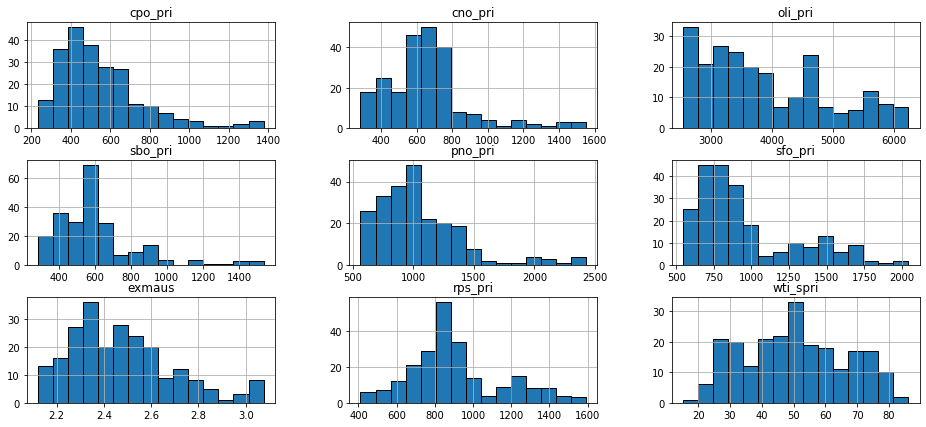

In [148]:
df[numerical_vars].hist(edgecolor='black', bins=15, figsize=(16, 7), layout = (3,3));

###Relationships between variables

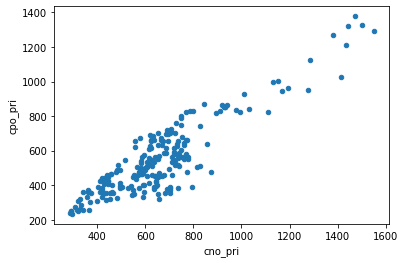

In [149]:
df.plot.scatter(x='cno_pri', y='cpo_pri');

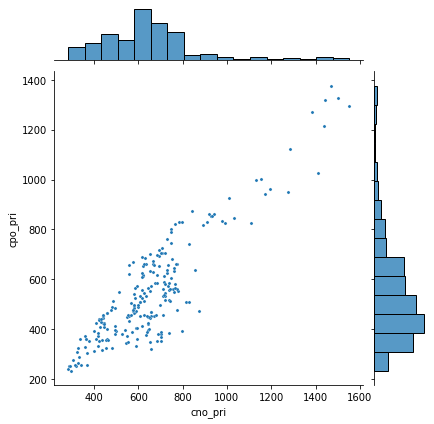

In [150]:
sns.jointplot(x='cno_pri', y='cpo_pri', data=df, joint_kws={"s": 10});

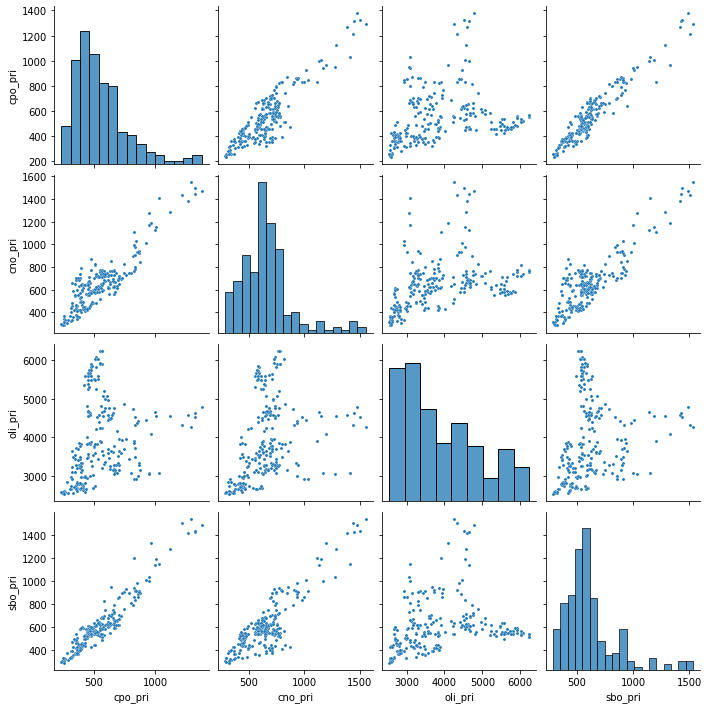

In [109]:
sns.pairplot(df[numerical_vars[:4]], plot_kws={"s": 10});

###Predictive Power Score

In [148]:
col = df2.columns
#.score will be a column in the matrix below
pps.score(df2,'cno_pri','cpo_pri')
df2_pps = df2[col]
ss = pps.matrix(df2)

In [149]:
matrix_df2 = pps.matrix(df2)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [150]:
matrix_df2

x,cno_pri,cpo_pri,exmaus,oli_pri,pno_pri,rps_pri,sbo_pri,sfo_pri,wti_spri
y,,,,,,,,,
cno_pri,1.000000,0.382476,0.000000,0.0,0.090017,0.000000,0.244899,0.000000,0.000000
cpo_pri,0.451502,1.000000,0.090417,0.0,0.225793,0.000000,0.600020,0.000000,0.000000
exmaus,0.000000,0.038113,1.000000,0.0,0.067062,0.110305,0.119403,0.276613,0.000000
oli_pri,0.000000,0.044539,0.000000,1.0,0.270682,0.162631,0.000000,0.032615,0.000428
pno_pri,0.110023,0.250891,0.000000,0.0,1.000000,0.000000,0.385937,0.000000,0.000000
rps_pri,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.285636,0.000000
sbo_pri,0.364741,0.575309,0.120153,0.0,0.319894,0.000000,1.000000,0.000000,0.000000
sfo_pri,0.000000,0.000000,0.182025,0.0,0.057604,0.195337,0.047819,1.000000,0.000000
wti_spri,0.000000,0.000000,0.125222,0.0,0.000000,0.194230,0.000000,0.088480,1.000000


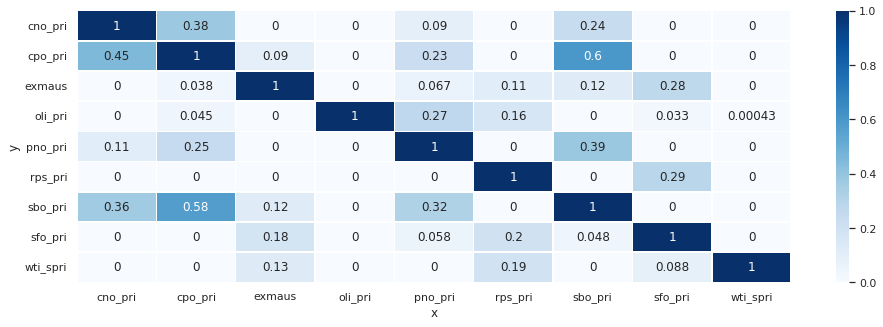

In [151]:
plt.figure(figsize = (16,5))
sns.heatmap(matrix_df2, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

####Selected variables based on the PPS are:
*   Select: cno_pri, pno_pri, sbo_pri
*   Drop:   exmaus, oli_pri, rps_pri, sfo_pri, and wti_spri



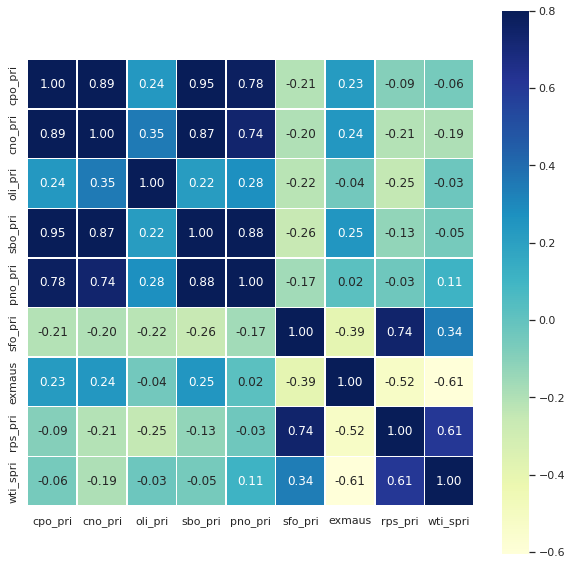

In [152]:
# The heatmap clearly shows the strength of correlation between pairs of variables
plt.figure(figsize=(10, 10))
sns.heatmap(data = df2.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

In [153]:
df2.corr()

,cpo_pri,cno_pri,oli_pri,sbo_pri,pno_pri,sfo_pri,exmaus,rps_pri,wti_spri
cpo_pri,1.000000,0.891723,0.236296,0.953051,0.776916,-0.210459,0.226669,-0.094080,-0.055629
cno_pri,0.891723,1.000000,0.349833,0.868407,0.735385,-0.198463,0.243321,-0.208911,-0.190697
oli_pri,0.236296,0.349833,1.000000,0.220800,0.276659,-0.220377,-0.042444,-0.246997,-0.027588
sbo_pri,0.953051,0.868407,0.220800,1.000000,0.883398,-0.255978,0.245384,-0.125801,-0.051980
pno_pri,0.776916,0.735385,0.276659,0.883398,1.000000,-0.166050,0.023160,-0.034386,0.110538
sfo_pri,-0.210459,-0.198463,-0.220377,-0.255978,-0.166050,1.000000,-0.389682,0.741891,0.341807
exmaus,0.226669,0.243321,-0.042444,0.245384,0.023160,-0.389682,1.000000,-0.519051,-0.606916
rps_pri,-0.094080,-0.208911,-0.246997,-0.125801,-0.034386,0.741891,-0.519051,1.000000,0.608432
wti_spri,-0.055629,-0.190697,-0.027588,-0.051980,0.110538,0.341807,-0.606916,0.608432,1.000000


####Based on correlation score we:
*   Select: 	cno_pri, sbo_pri, pno_pri
*   Drop:     oli_pri, sfo_pri, exmaus, rps_pri,	wti_spri



###Scatterplot matrix

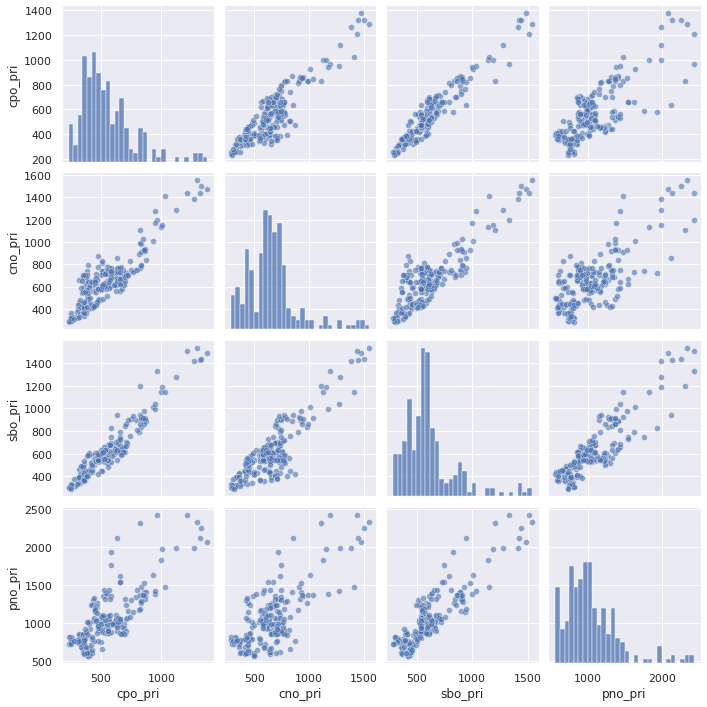

In [154]:
sns.pairplot(df2[['cpo_pri', 'cno_pri', 'sbo_pri', 'pno_pri']],
    plot_kws={'alpha': 0.6},
     diag_kws={'bins': 30}) 
plt.show()

####Scatterplots along with the line of best fit linear models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


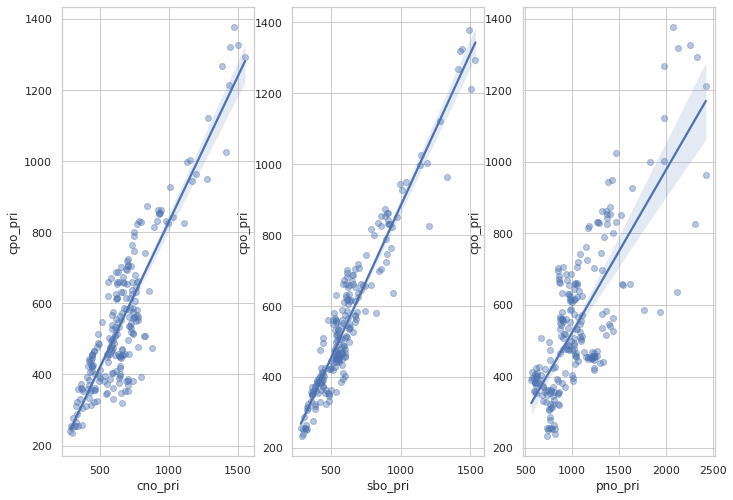

In [155]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3)
sns.regplot('cno_pri', 'cpo_pri', df2, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('sbo_pri', 'cpo_pri', df2, ax=ax[1],
scatter_kws={'alpha': 0.4})
sns.regplot('pno_pri', 'cpo_pri', df2, ax=ax[2],
scatter_kws={'alpha': 0.4})
plt.show()

####Plot the residuals for these relationships

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


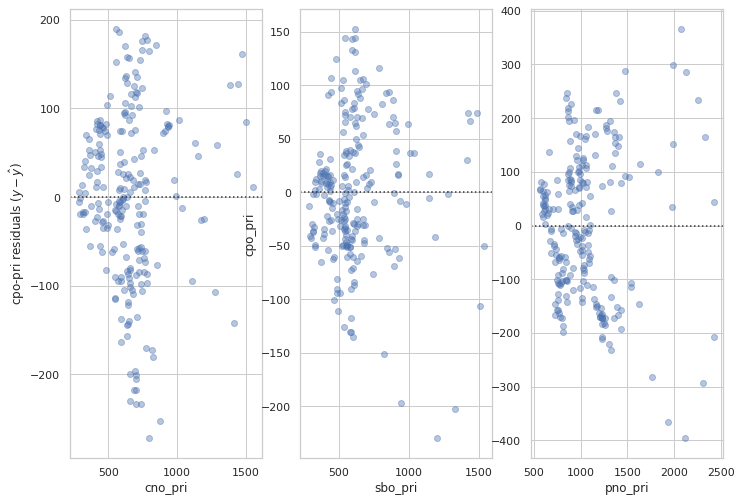

In [156]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3)
ax[0] = sns.residplot('cno_pri', 'cpo_pri', df2, ax=ax[0],
                      scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('cpo-pri residuals $(y-\hat{y})$')
ax[1] = sns.residplot('sbo_pri', 'cpo_pri', df2, ax=ax[1],
                      scatter_kws={'alpha': 0.4})
ax[1] = sns.residplot('pno_pri', 'cpo_pri', df2, ax=ax[2],
                      scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')
plt.show()

####Boxplots showing the distribution of the data

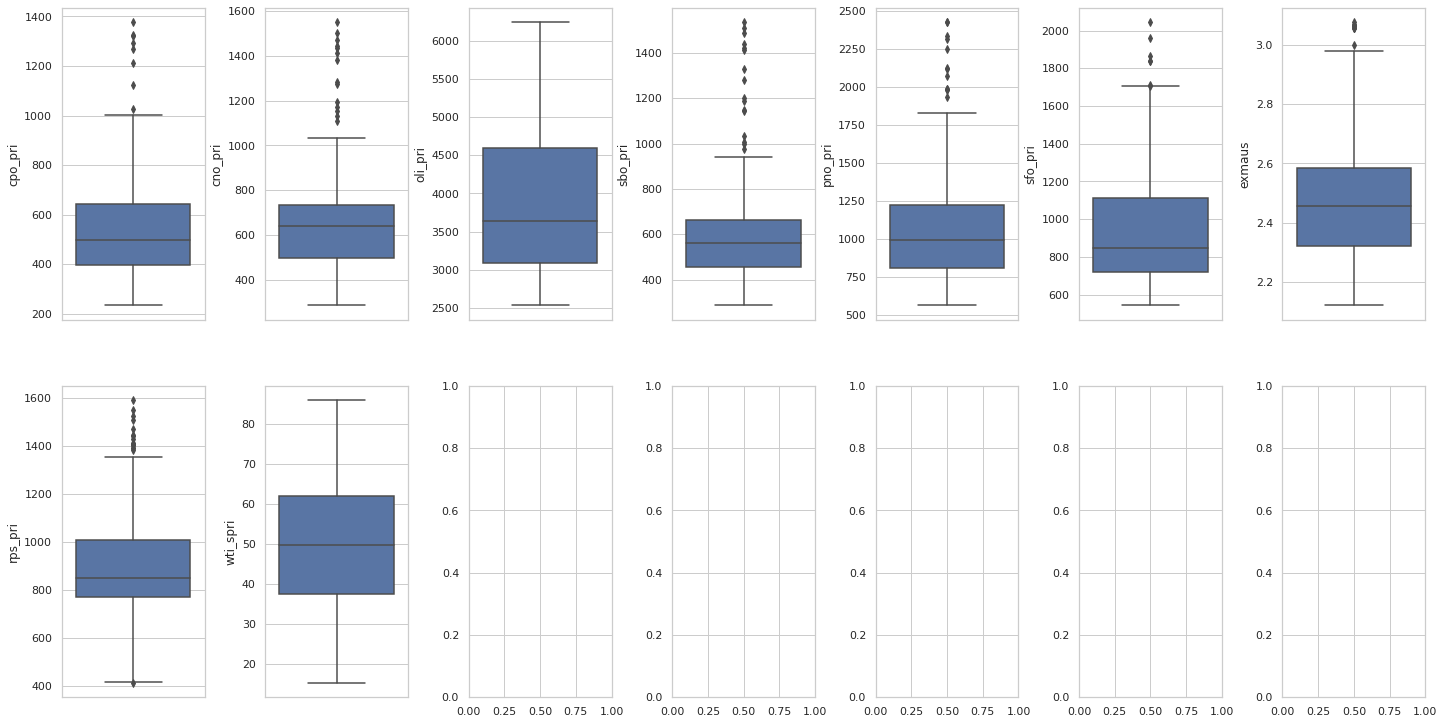

In [157]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df2.items():
    sns.boxplot(y=k, data=df2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

####Inference
There are several columns appear to have outliers.

####Percentage of outliers in each column

In [158]:
for k, v in df2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column cpo_pri outliers = 3.48%
Column cno_pri outliers = 6.09%
Column oli_pri outliers = 0.00%
Column sbo_pri outliers = 6.96%
Column pno_pri outliers = 5.22%
Column sfo_pri outliers = 3.04%
Column exmaus outliers = 3.91%
Column rps_pri outliers = 6.96%
Column wti_spri outliers = 0.00%


In [121]:
#df2 = df2[~(df2['cpo_pri'] >= 50)]
#print(np.shape(df2))

(0, 9)


###Feature Selection

In [159]:
df2.head()

,cpo_pri,cno_pri,oli_pri,sbo_pri,pno_pri,sfo_pri,exmaus,rps_pri,wti_spri
0,323,455,3102.61,468.0,844.0,578.0,3.0755,423.45,28.67
1,345,546,3100.45,485.0,799.0,557.0,3.0661,415.85,24.49
2,362,595,3199.41,466.0,718.0,552.0,3.0659,410.77,22.06
3,376,636,3281.67,442.0,614.0,574.0,3.0671,414.82,21.64
4,383,738,3261.65,429.0,619.0,595.0,3.0635,451.04,22.30


In [160]:
prices = df2['cpo_pri']
df2 = df2.drop(['oli_pri','sfo_pri','exmaus','rps_pri','wti_spri'], axis = 1)
features = df2.drop('cpo_pri', axis = 1)
df2.head()

,cpo_pri,cno_pri,sbo_pri,pno_pri
0,323,455,468.0,844.0
1,345,546,485.0,799.0
2,362,595,466.0,718.0
3,376,636,442.0,614.0
4,383,738,429.0,619.0


In [172]:
dfM = df[['Month']]

In [173]:
dfM.head()

,Month
0,2002-02-01
1,2002-03-01
2,2002-04-01
3,2002-05-01
4,2002-06-01


In [178]:
cleaned_data = pd.concat([dfM,df2], axis=1, join='inner')

In [179]:
cleaned_data.head()

,Month,cpo_pri,cno_pri,sbo_pri,pno_pri
0,2002-02-01,323,455,468.0,844.0
1,2002-03-01,345,546,485.0,799.0
2,2002-04-01,362,595,466.0,718.0
3,2002-05-01,376,636,442.0,614.0
4,2002-06-01,383,738,429.0,619.0


####Save the cleaned data to a csv file

In [180]:
cleaned_data.to_csv('/content/gdrive/MyDrive/raw_data/cleaned_data.csv')